# Part 1: Launch a Duet Server and upload data

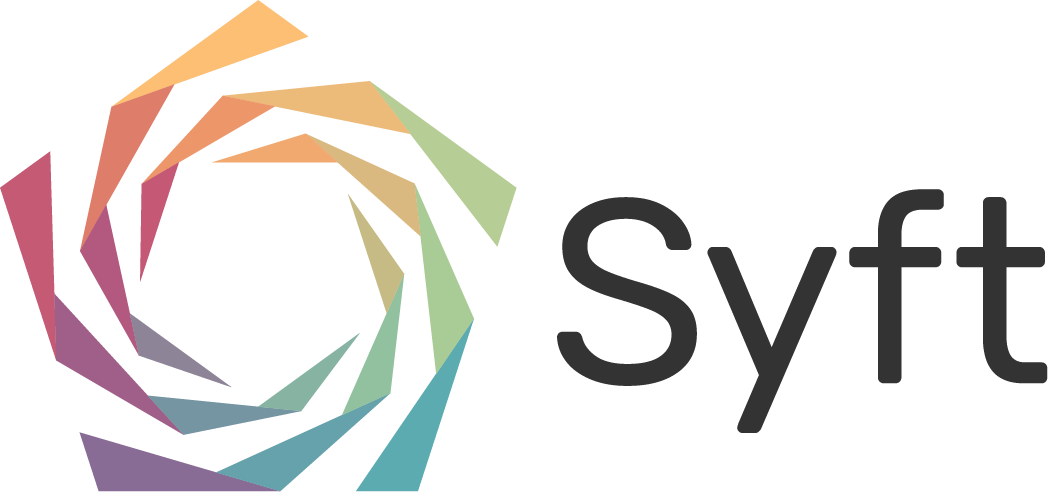

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ >             Use at your own risk.
♫♫♫ >
♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... DONE!
♫♫♫ >
♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.duet("36d436412e182aa479521c797b9465c4")

♫♫♫ > STEP 2: Running the code above will print out a 'Client ID'.
♫♫♫ >         Have your duet partner send it to you and enter it below!

Running loopback mode. Use sy.join_duet(loopback=True) on the other side.
♫♫♫ > Connecting...
♫♫♫ > ...using a running event loop...

♫♫♫ > CONNECTED!

♫♫♫ > DUET LIVE STATUS  *  Objects: 6  Requests: 0   Messages: 95                                > HANDLER Request : To evaluate training progress
♫♫♫ > DUET LIVE STATUS  *  Objects: 7  Requests: 0   Messages: 104             

In [1]:
import syft as sy
duet = sy.duet(loopback=True)

In [2]:
import torch as th
import numpy as np

In [3]:
data = th.FloatTensor(np.array([60, 65, 75, 85, 95]).reshape(-1, 1))

data = data.tag("DO2 data")
data = data.describe("Dataset of 5 samples, 1 feature")

data_ptr = data.send(duet, searchable=True)

In [4]:
duet.store.pandas

ID        Tags  \
0  <UID: e5b6c9c74cb4408aa4f4953d8e5041da>  [DO2 data]   

                       Description  
0  Dataset of 5 samples, 1 feature

In [5]:
data

tensor([[60.],
        [65.],
        [75.],
        [85.],
        [95.]])

In [6]:
duet.requests.add_handler(
    action="accept",
    print_local=True,  # print the result in your notebook
)

> HANDLER Request : To evaluate training progress
Value: 4783.2255859375
> HANDLER Request : To evaluate training progress
Value: 3764.81591796875
> HANDLER Request : To evaluate training progress
Value: 2872.36083984375
> HANDLER Request : To evaluate training progress
Value: 2107.156494140625
> HANDLER Request : To evaluate training progress
Value: 955.904296875
> HANDLER Request : To evaluate training progress
Value: 284.0714416503906
> HANDLER Request : To evaluate training progress
Value: 107.63623046875
> HANDLER Request : To evaluate training progress
Value: 20.289325714111328
> HANDLER Request :
Value: [Parameter containing:
tensor([[0.6246]], requires_grad=True), Parameter containing:
tensor([1.1733], requires_grad=True)]
> HANDLER Request :
Value: in_features=1, out_features=1, bias=True
> HANDLER Request :
Value: OrderedDict([('weight', tensor([[0.6246]])), ('bias', tensor([1.1733]))])
